In [1]:
import re ,scipy,os ,glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt, ticker
import scipy.optimize as opt
from collections import defaultdict
import numpy as np
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

In [16]:
x2_tpsa

0       45.97
1       25.25
2       32.50
3       55.28
4       92.07
        ...  
3195    24.06
3196    73.23
3197     0.00
3198    57.28
3199    41.04
Name: TPSA_True, Length: 3200, dtype: float64

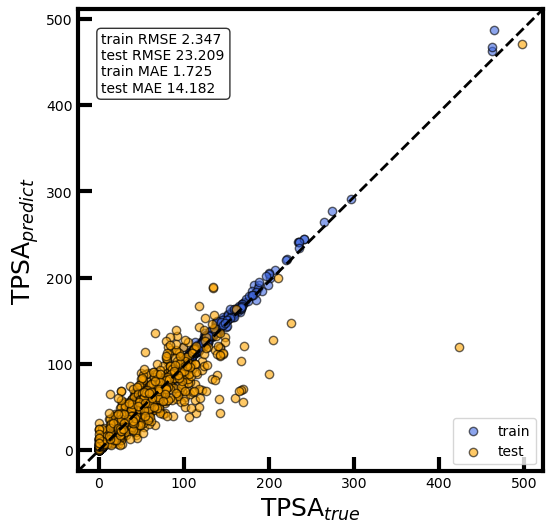

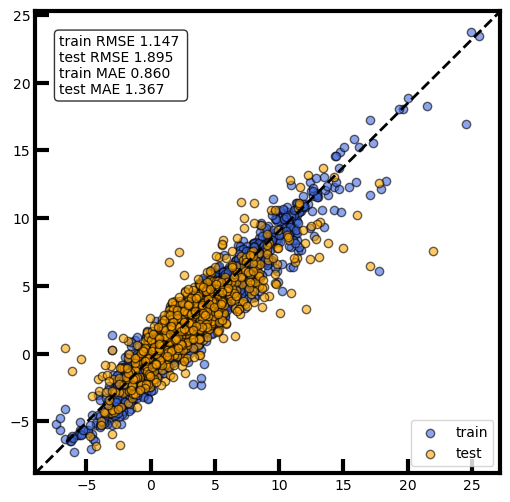

In [17]:
trainfile = '/home/scorej41075/CompChempractice/2-1024/train-error-output/epoch-55-train_error.csv'
testfile = '/home/scorej41075/CompChempractice/2-1024/test-error-output/epoch-55-test_error.csv'
df_train = pd.read_csv(trainfile,header=0)
df_test = pd.read_csv(testfile,header=0)

target = 'TPSA'
y1_tpsa = df_train[target + '_Predict']
x1_tpsa = df_train[target + '_True']  
y2_tpsa = df_test[target + '_Predict']
x2_tpsa = df_test[target + '_True']  
tpsa_rmse1 = np.sqrt(np.mean((x1_tpsa-y1_tpsa)**2))
tpsa_mae_1 = np.mean(abs(x1_tpsa-y1_tpsa))
tpsa_rmse2 = np.sqrt(np.mean((x2_tpsa-y2_tpsa)**2))
tpsa_mae_2 = np.mean(abs(x2_tpsa-y2_tpsa))
target = 'Logp'
y1_logp = df_train['LogP_predict']
x1_logp = df_train[target + '_True']  
y2_logp = df_test['LogP_predict']
x2_logp = df_test[target + '_True']  
logp_rmse1 = np.sqrt(np.mean((x1_logp-y1_logp)**2))
logp_mae_1 = np.mean(abs(x1_logp-y1_logp))
logp_rmse2 = np.sqrt(np.mean((x2_logp-y2_logp)**2))
logp_mae_2 = np.mean(abs(x2_logp-y2_logp))


fig, ax = plt.subplots(figsize=(6,6))
# print(f)
target = 'TPSA'
xlabel, ylabel = '%s$_{true}$'%(str.upper(target)),'%s$_{predict}$' %(str.upper(target))

ax.set_xlabel(xlabel, fontsize=18)
ax.set_ylabel(ylabel, fontsize=18)
## find the boundaries of X and Y values
# Ensure the aspect ratio is square
# ax.set_aspect("equal", adjustable="box")
# rmse2 = np.sqrt(np.mean((x2-y2)**2))
# mae_2 = np.mean(abs(x2-y2))

dist = [[0,5],[0,5]]
#string = '\n'.join(('train RMSE %.3f'%rmse1)),'test RMSE %.3f'%rmse2))
string = 'train RMSE %.3f \ntest RMSE %.3f\ntrain MAE %.3f\ntest MAE %.3f'%(tpsa_rmse1,tpsa_rmse2,tpsa_mae_1,tpsa_mae_2)
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
ax.text(0.05, 0.95, string, transform=ax.transAxes, fontsize=10,
        verticalalignment='top',bbox=props)
ax.scatter(x1_tpsa,y1_tpsa,c='royalblue',edgecolors='black',label='train',alpha=0.6)
ax.scatter(x2_tpsa,y2_tpsa,c='orange',edgecolors='black',label='test',alpha=0.6)
ax.plot([0, 1], [0, 1], "--",lw=2,c = 'black',transform=ax.transAxes)
plt.legend(loc='lower right')
fig, ax = plt.subplots(figsize=(6,6))
# print(f)
target = 'Logp'
xmin, xmax = 0,1
ymin, ymax = 0,1
xmajor, xminor = 0.5,0.25
ymajor, yminor = 0.5,0.25
xlabel, ylabel = '%s$_{true}$'%(str.upper(target)),'%s$_{predict}$' %(str.upper(target))

## find the boundaries of X and Y values
# Ensure the aspect ratio is square
# ax.set_aspect("equal", adjustable="box")
# rmse2 = np.sqrt(np.mean((x2-y2)**2))
# mae_2 = np.mean(abs(x2-y2))

dist = [[0,5],[0,5]]
#string = '\n'.join(('train RMSE %.3f'%rmse1)),'test RMSE %.3f'%rmse2))
string = 'train RMSE %.3f \ntest RMSE %.3f\ntrain MAE %.3f\ntest MAE %.3f'%(logp_rmse1,logp_rmse2,logp_mae_1,logp_mae_2)
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
ax.text(0.05, 0.95, string, transform=ax.transAxes, fontsize=10,
        verticalalignment='top',bbox=props)
ax.scatter(x1_logp,y1_logp,c='royalblue',edgecolors='black',label='train',alpha=0.6)
ax.scatter(x2_logp,y2_logp,c='orange',edgecolors='black',label='test',alpha=0.6)
ax.plot([0, 1], [0, 1], "--",lw=2,c = 'black',transform=ax.transAxes)
plt.legend(loc='lower right')
